<a href="https://colab.research.google.com/github/Sris-Polimetla/PRODIGY_DS_02/blob/main/PRODIGI_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

In [ ]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats

    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values

    def get_info(self):
        info = self.df.info()
        return info

    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes

    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
du = DataUnderstanding(df)

In [ ]:
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
du.get_dtypes()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
du.get_missing_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:

most_frequent_port = df['Embarked'].mode()[0]

df['Embarked'].fillna(most_frequent_port, inplace=True)

In [ ]:
df.dropna(subset=['Age'], inplace=True)

In [ ]:
du.get_value_counts()

{'PassengerId': PassengerId
 1      1
 599    1
 588    1
 589    1
 590    1
       ..
 301    1
 302    1
 303    1
 304    1
 891    1
 Name: count, Length: 891, dtype: int64,
 'Survived': Survived
 0    549
 1    342
 Name: count, dtype: int64,
 'Pclass': Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64,
 'Name': Name
 Braund, Mr. Owen Harris                     1
 Boulos, Mr. Hanna                           1
 Frolicher-Stehli, Mr. Maxmillian            1
 Gilinski, Mr. Eliezer                       1
 Murdlin, Mr. Joseph                         1
                                            ..
 Kelly, Miss. Anna Katherine "Annie Kate"    1
 McCoy, Mr. Bernard                          1
 Johnson, Mr. William Cahoone Jr             1
 Keane, Miss. Nora A                         1
 Dooley, Mr. Patrick                         1
 Name: count, Length: 891, dtype: int64,
 'Sex': Sex
 male      577
 female    314
 Name: count, dtype: int64,
 'Age': Age
 24.00    30
 22.00  

In [ ]:
df.duplicated(subset='PassengerId').sum()

0

In [ ]:
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

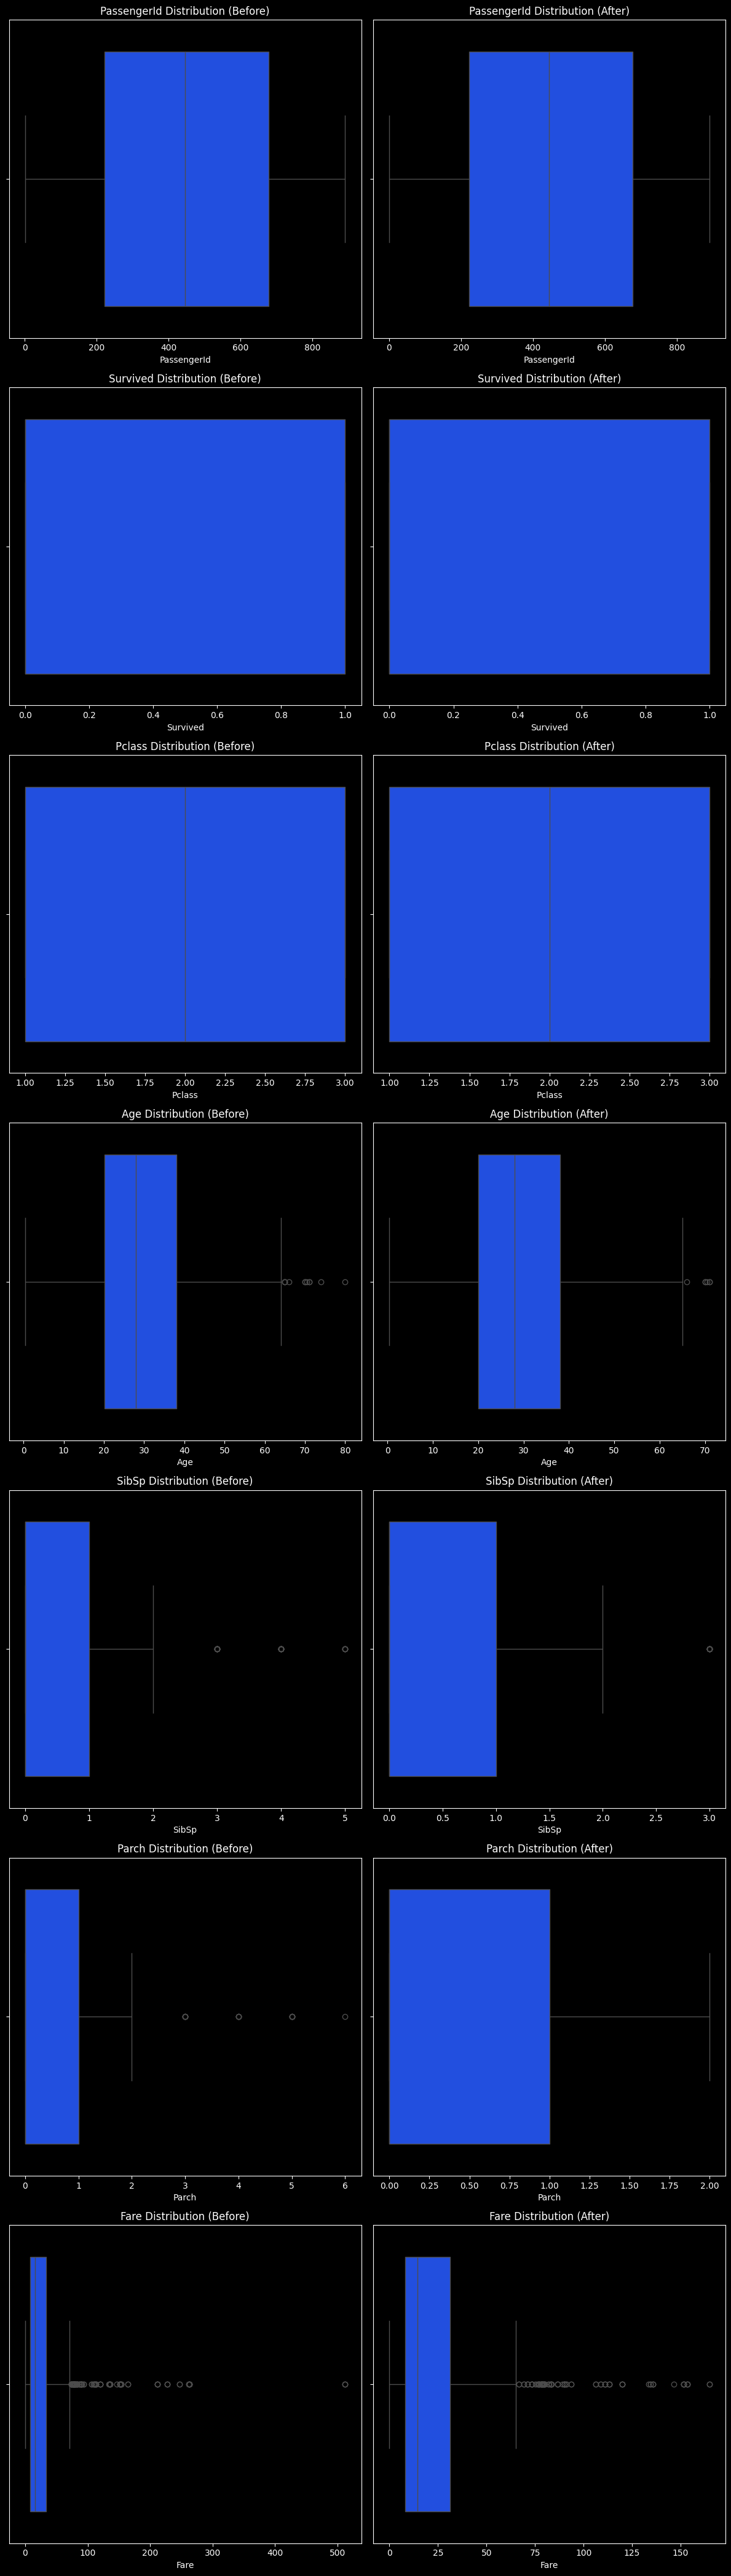

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set the background style
plt.style.use('dark_background')

# Define a custom color palette
custom_palette = sns.color_palette("bright")

# Set the palette
sns.set_palette(custom_palette)

def outlier_plot_box(df, column_name, ax=None):
    sns.boxplot(x=df[column_name], ax=ax)

def remove_outliers(data, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data = data[(z_scores < threshold)]
    return data

def plot_outliers_before_and_after(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        df_cleaned = remove_outliers(df, [column], threshold=threshold)

        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

# Assuming df and numerical_columns are defined elsewhere
plot_outliers_before_and_after(df, numerical_columns)


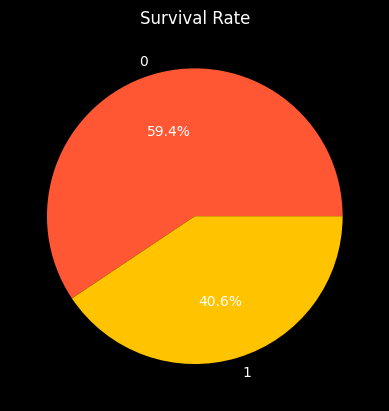

In [ ]:
import matplotlib.pyplot as plt

def plot_survival_rate(df):

    plt.style.use('dark_background')


    fig, ax = plt.subplots()


    colors = ['#FF5733', '#FFC300']


    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%', colors=colors)


    ax.set_title('Survival Rate')


    plt.show()


plot_survival_rate(df)


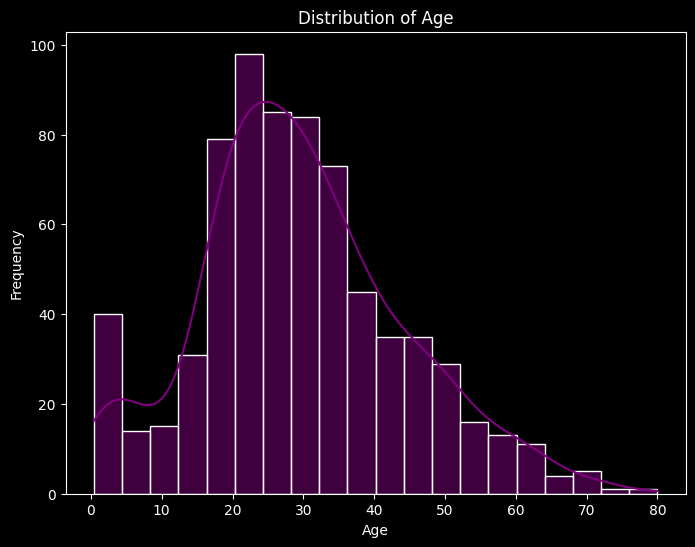

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Change the color here
sns.histplot(data=df, x='Age', bins=20, kde=True, color='purple')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


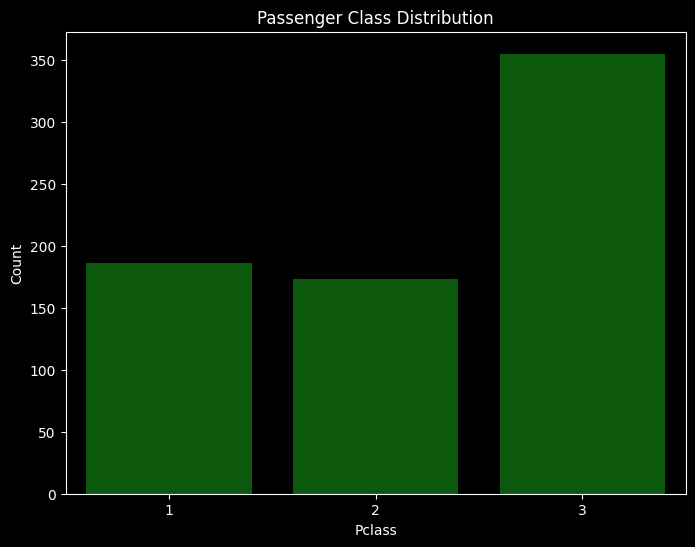

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Change the color here
sns.countplot(data=df, x='Pclass', color='darkgreen')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()


In [ ]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Scatter Plot of Age vs. Fare')
fig.show()

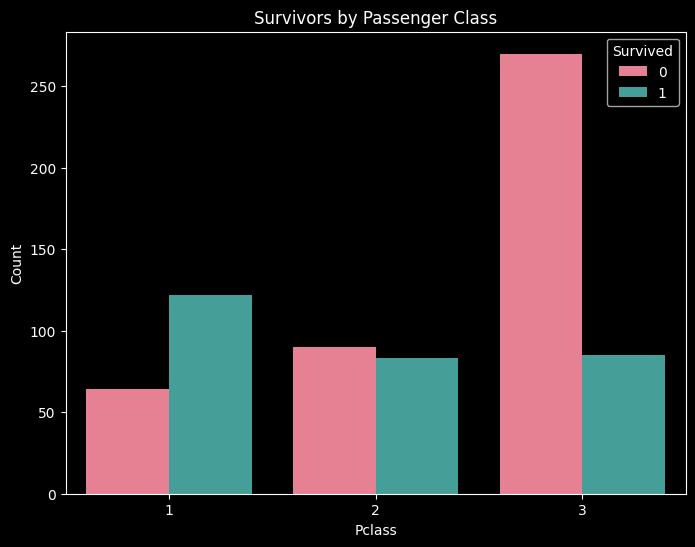

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Change the palette here
sns.countplot(data=df, x='Pclass', hue='Survived', palette='husl')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survivors by Passenger Class')
plt.show()


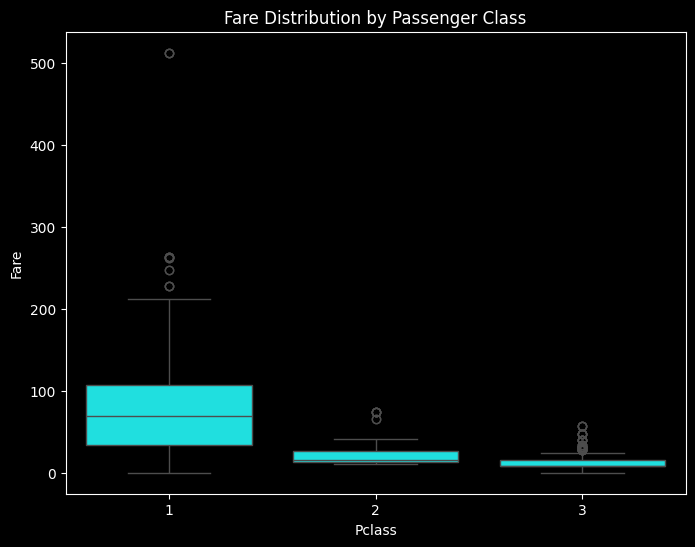

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Change the color here
sns.boxplot(data=df, x='Pclass', y='Fare', color='cyan')

plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()


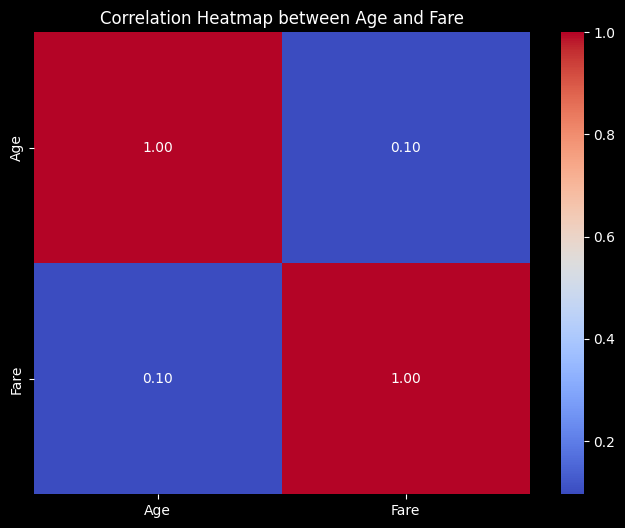

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Age', 'Fare']].corr()

plt.figure(figsize=(8, 6))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap between Age and Fare')
plt.show()


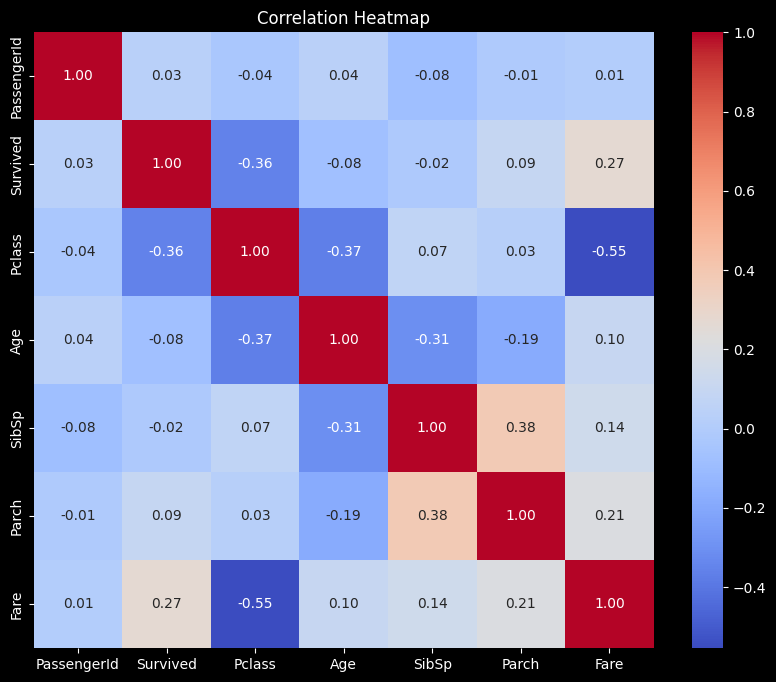

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()


<Figure size 1000x800 with 0 Axes>

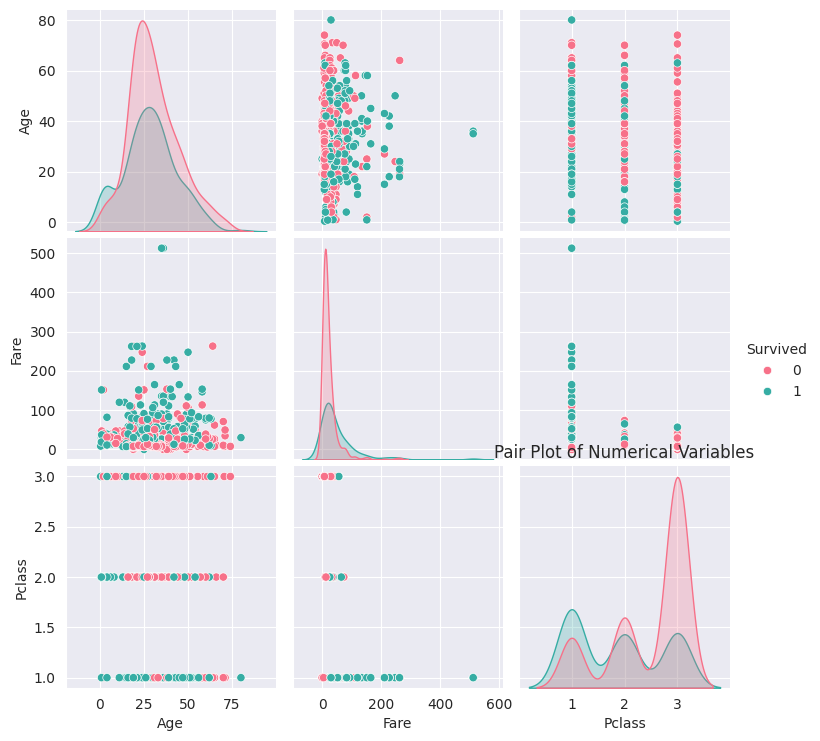

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("darkgrid")

plt.figure(figsize=(10, 8))


sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='husl')

plt.title('Pair Plot of Numerical Variables')
plt.show()


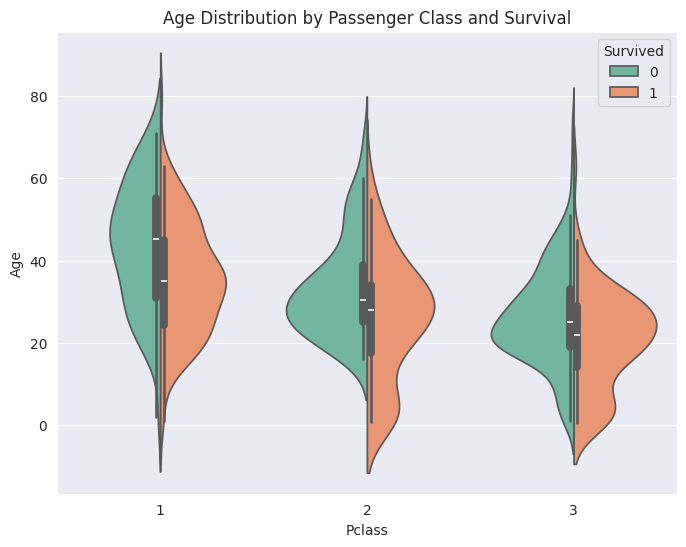

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Change the color palette here
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Set2', split=True)

plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()


In [ ]:
fig = px.parallel_coordinates(df, dimensions=['Age', 'Fare', 'Pclass', 'Survived'], color='Survived')
fig.show()